In [ ]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define your dataset path
dataset_path = '/content/drive/MyDrive/TEL'

# List available emotion folders
import os
emotion_folders = [f for f in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, f))]
print("Emotion folders:", emotion_folders)


Mounted at /content/drive
Emotion folders: ['sad', 'happy', 'nuetral', 'suprised', 'angry']


In [ ]:
import glob

# Create list of all file paths and their emotion labels
audio_files = []
labels = []

for emotion in emotion_folders:
    folder_path = os.path.join(dataset_path, emotion)
    files = glob.glob(os.path.join(folder_path, "*.wav"))  # Assuming .wav files
    audio_files.extend(files)
    labels.extend([emotion] * len(files))

print(f"Total original samples: {len(audio_files)}")


Total original samples: 458


In [ ]:
from sklearn.model_selection import train_test_split

# Split into train and test (80-20)
train_files, test_files, train_labels, test_labels = train_test_split(
    audio_files, labels, test_size=0.2, stratify=labels, random_state=42
)

print("Train samples:", len(train_files))
print("Test samples:", len(test_files))


Train samples: 366
Test samples: 92


In [ ]:
!pip install audiomentations


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.9/85.9 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.1/260.1 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.4/113.4 kB 11.0 MB/s eta 0:00:00
  Attempting uninstall: librosa
    Found existing installation: librosa 0.11.0
    Uninstalling librosa-0.11.0:
      Successfully uninstalled librosa-0.11.0


In [ ]:
import librosa
import numpy as np
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift
import os
import soundfile as sf
import random
from tqdm import tqdm

# Define where to save augmented audio
augmented_dir = "/content/augmented_train_audio"
os.makedirs(augmented_dir, exist_ok=True)

# Create augmentation pipeline
augment = Compose([
    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=0.5),
    TimeStretch(min_rate=0.8, max_rate=1.25, p=0.5),
    PitchShift(min_semitones=-4, max_semitones=4, p=0.5),
    Shift(min_shift=-0.5, max_shift=0.5, p=0.5)  # Shift in seconds
])


In [ ]:
# How many augmented files to generate
target_augmented = 5542

# For storing augmented data paths and labels
augmented_files = []
augmented_labels = []

print(f"Generating {target_augmented} augmented samples from training set of {len(train_files)} files...")

for i in tqdm(range(target_augmented)):
    try:
        # Randomly pick a training sample
        idx = random.randint(0, len(train_files) - 1)
        file_path = train_files[idx]
        label = train_labels[idx]

        # Load audio
        samples, sr = librosa.load(file_path, sr=None)

        # Apply augmentation
        augmented_samples = augment(samples=samples, sample_rate=sr)

        # Save to disk
        aug_filename = f"aug_{i}_{os.path.basename(file_path)}"
        save_path = os.path.join(augmented_dir, aug_filename)
        sf.write(save_path, augmented_samples, sr)

        # Store path and label
        augmented_files.append(save_path)
        augmented_labels.append(label)

    except Exception as e:
        print(f"Error with file {file_path}: {e}")

print(f"\n✅ Done! Generated {len(augmented_files)} augmented samples.")

Generating 5542 augmented samples from training set of 366 files...


  1%|▏         | 81/5542 [01:09<53:50,  1.69it/s]/tmp/ipython-input-7-1295171147.py:18: UserWarning: PySoundFile failed. Trying audioread instead.
  samples, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error with file /content/drive/MyDrive/TEL/sad/S45_SRI_C03_G1_D03_SPKF21_V1_SA4_MMM.wav: 


  5%|▍         | 255/5542 [02:32<34:58,  2.52it/s]

Error with file /content/drive/MyDrive/TEL/sad/S45_SRI_C03_G1_D03_SPKF21_V1_SA4_MMM.wav: 


  6%|▌         | 332/5542 [02:58<27:24,  3.17it/s]

Error with file /content/drive/MyDrive/TEL/sad/S45_SRI_C01_G2_D04_SPKF21_V1_SA4_MMM.wav: 


  7%|▋         | 369/5542 [03:10<19:46,  4.36it/s]

Error with file /content/drive/MyDrive/TEL/sad/S45_SRI_C03_G1_D03_SPKF21_V1_SA4_MMM.wav: 


  8%|▊         | 470/5542 [03:39<10:58,  7.70it/s]

Error with file /content/drive/MyDrive/TEL/sad/S45_SRI_C01_G2_D04_SPKF21_V1_SA4_MMM.wav: 


 12%|█▏        | 644/5542 [04:21<21:15,  3.84it/s]

Error with file /content/drive/MyDrive/TEL/sad/S45_SRI_C01_G2_D04_SPKF21_V1_SA4_MMM.wav: 


 12%|█▏        | 685/5542 [04:32<21:17,  3.80it/s]

Error with file /content/drive/MyDrive/TEL/sad/S45_SRI_C01_G2_D04_SPKF21_V1_SA4_MMM.wav: 


 16%|█▌        | 874/5542 [05:04<09:41,  8.03it/s]

Error with file /content/drive/MyDrive/TEL/sad/S45_SRI_C03_G1_D03_SPKF21_V1_SA4_MMM.wav: 


 20%|█▉        | 1104/5542 [05:33<12:41,  5.83it/s]

Error with file /content/drive/MyDrive/TEL/sad/S45_SRI_C01_G2_D04_SPKF21_V1_SA4_MMM.wav: 


 25%|██▌       | 1403/5542 [06:08<04:33, 15.11it/s]

Error with file /content/drive/MyDrive/TEL/sad/S45_SRI_C01_G2_D04_SPKF21_V1_SA4_MMM.wav: 


 27%|██▋       | 1516/5542 [06:22<11:44,  5.71it/s]

Error with file /content/drive/MyDrive/TEL/sad/S45_SRI_C03_G1_D03_SPKF21_V1_SA4_MMM.wav: 


 33%|███▎      | 1821/5542 [06:55<05:57, 10.42it/s]

Error with file /content/drive/MyDrive/TEL/sad/S45_SRI_C01_G2_D04_SPKF21_V1_SA4_MMM.wav: 


 36%|███▌      | 1982/5542 [07:11<05:43, 10.37it/s]

Error with file /content/drive/MyDrive/TEL/sad/S45_SRI_C03_G1_D03_SPKF21_V1_SA4_MMM.wav: 


 38%|███▊      | 2086/5542 [07:20<04:25, 13.03it/s]

Error with file /content/drive/MyDrive/TEL/sad/S45_SRI_C01_G2_D04_SPKF21_V1_SA4_MMM.wav: 


 40%|████      | 2220/5542 [07:32<04:05, 13.53it/s]

Error with file /content/drive/MyDrive/TEL/sad/S45_SRI_C03_G1_D03_SPKF21_V1_SA4_MMM.wav: 


 42%|████▏     | 2341/5542 [07:43<03:21, 15.91it/s]

Error with file /content/drive/MyDrive/TEL/sad/S45_SRI_C03_G1_D03_SPKF21_V1_SA4_MMM.wav: 


 45%|████▍     | 2479/5542 [07:53<03:57, 12.89it/s]

Error with file /content/drive/MyDrive/TEL/sad/S45_SRI_C01_G2_D04_SPKF21_V1_SA4_MMM.wav: 


 54%|█████▍    | 3007/5542 [08:40<02:18, 18.36it/s]

Error with file /content/drive/MyDrive/TEL/sad/S45_SRI_C03_G1_D03_SPKF21_V1_SA4_MMM.wav: 


 62%|██████▏   | 3410/5542 [09:18<02:30, 14.17it/s]

Error with file /content/drive/MyDrive/TEL/sad/S45_SRI_C01_G2_D04_SPKF21_V1_SA4_MMM.wav: 


 68%|██████▊   | 3741/5542 [09:50<02:15, 13.27it/s]

Error with file /content/drive/MyDrive/TEL/sad/S45_SRI_C03_G1_D03_SPKF21_V1_SA4_MMM.wav: 


 70%|███████   | 3895/5542 [10:04<01:24, 19.43it/s]

Error with file /content/drive/MyDrive/TEL/sad/S45_SRI_C03_G1_D03_SPKF21_V1_SA4_MMM.wav: 


 72%|███████▏  | 4004/5542 [10:15<01:12, 21.14it/s]

Error with file /content/drive/MyDrive/TEL/sad/S45_SRI_C03_G1_D03_SPKF21_V1_SA4_MMM.wav: 


 77%|███████▋  | 4280/5542 [10:41<01:25, 14.74it/s]

Error with file /content/drive/MyDrive/TEL/sad/S45_SRI_C01_G2_D04_SPKF21_V1_SA4_MMM.wav: 


 78%|███████▊  | 4334/5542 [10:45<01:26, 13.99it/s]

Error with file /content/drive/MyDrive/TEL/sad/S45_SRI_C01_G2_D04_SPKF21_V1_SA4_MMM.wav: 


 88%|████████▊ | 4859/5542 [11:30<00:55, 12.29it/s]

Error with file /content/drive/MyDrive/TEL/sad/S45_SRI_C03_G1_D03_SPKF21_V1_SA4_MMM.wav: 


 91%|█████████ | 5048/5542 [11:49<00:40, 12.28it/s]

Error with file /content/drive/MyDrive/TEL/sad/S45_SRI_C01_G2_D04_SPKF21_V1_SA4_MMM.wav: 


 92%|█████████▏| 5074/5542 [11:52<00:40, 11.44it/s]

Error with file /content/drive/MyDrive/TEL/sad/S45_SRI_C01_G2_D04_SPKF21_V1_SA4_MMM.wav: 


 93%|█████████▎| 5173/5542 [12:02<00:27, 13.23it/s]

Error with file /content/drive/MyDrive/TEL/sad/S45_SRI_C01_G2_D04_SPKF21_V1_SA4_MMM.wav: 


 94%|█████████▍| 5199/5542 [12:04<00:21, 16.23it/s]

Error with file /content/drive/MyDrive/TEL/sad/S45_SRI_C01_G2_D04_SPKF21_V1_SA4_MMM.wav: 


 99%|█████████▉| 5510/5542 [12:32<00:02, 15.25it/s]

Error with file /content/drive/MyDrive/TEL/sad/S45_SRI_C01_G2_D04_SPKF21_V1_SA4_MMM.wav: 


100%|██████████| 5542/5542 [12:35<00:00,  7.34it/s]


✅ Done! Generated 5512 augmented samples.


In [ ]:
!pip install -q librosa pandas numpy


In [ ]:
import librosa
import numpy as np

def extract_features(file_path):
    try:
        y, sr = librosa.load(file_path, sr=None)

        # MFCC
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        mfccs_mean = np.mean(mfccs, axis=1)

        # Chroma
        chroma = librosa.feature.chroma_stft(y=y, sr=sr)
        chroma_mean = np.mean(chroma, axis=1)

        # Mel Spectrogram
        mel = librosa.feature.melspectrogram(y=y, sr=sr)
        mel_mean = np.mean(mel, axis=1)

        # ZCR
        zcr = librosa.feature.zero_crossing_rate(y)
        zcr_mean = np.mean(zcr)

        # RMS
        rms = librosa.feature.rms(y=y)
        rms_mean = np.mean(rms)

        # Combine all features into one flat list
        feature_vector = list(mfccs_mean) + list(chroma_mean) + list(mel_mean) + [zcr_mean, rms_mean]
        return feature_vector

    except Exception as e:
        print(f"❌ Error in {file_path}: {e}")
        return None


In [ ]:
# Combine all audio paths and labels
all_files = train_files + augmented_files + test_files
all_labels = train_labels + augmented_labels + test_labels

print(f"Total files to process: {len(all_files)}")


Total files to process: 5970


In [ ]:
import pandas as pd

data = []
failed = 0

for file, label in tqdm(zip(all_files, all_labels), total=len(all_files)):
    features = extract_features(file)
    if features is not None:
        data.append(features + [label])
    else:
        failed += 1

print(f"\n✅ Feature extraction complete. {len(data)} samples processed, {failed} failed.")


  3%|▎         | 204/5970 [00:31<08:49, 10.89it/s]/tmp/ipython-input-9-1738478970.py:6: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=None)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
  3%|▎         | 207/5970 [00:31<07:00, 13.71it/s]

❌ Error in /content/drive/MyDrive/TEL/sad/S45_SRI_C03_G1_D03_SPKF21_V1_SA4_MMM.wav: 


  5%|▌         | 327/5970 [00:49<08:51, 10.62it/s]

❌ Error in /content/drive/MyDrive/TEL/sad/S45_SRI_C01_G2_D04_SPKF21_V1_SA4_MMM.wav: 


100%|██████████| 5970/5970 [14:32<00:00,  6.85it/s]


✅ Feature extraction complete. 5968 samples processed, 2 failed.


In [ ]:
# Create feature names
mfcc_cols = [f"mfcc_{i+1}" for i in range(13)]
chroma_cols = [f"chroma_{i+1}" for i in range(12)]
mel_cols = [f"mel_{i+1}" for i in range(128)]
other_cols = ["zcr", "rms"]
columns = mfcc_cols + chroma_cols + mel_cols + other_cols + ["label"]

# Create dataframe and save
df = pd.DataFrame(data, columns=columns)
df.to_csv("/content/final_features_dataset.csv", index=False)

print("✅ Final CSV saved as: /content/final_features_dataset.csv")


✅ Final CSV saved as: /content/final_features_dataset.csv


In [ ]:
# Optional: Upload CSV to your Google Drive
import shutil

# Destination in your Google Drive
dest_path = "/content/drive/MyDrive/final_features_dataset.csv"

# Copy file
shutil.copy("/content/final_features_dataset.csv", dest_path)

print("✅ CSV file uploaded to your Drive at:", dest_path)


✅ CSV file uploaded to your Drive at: /content/drive/MyDrive/final_features_dataset.csv


In [ ]:
# Upload CSV
from google.colab import files
uploaded = files.upload()

# Load CSV
import pandas as pd
import io
df = pd.read_csv(io.BytesIO(uploaded[list(uploaded.keys())[0]]))

# Split features and labels
X = df.drop("label", axis=1)
y = df["label"]

# Encode labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train/Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)


Saving final_features_dataset.csv to final_features_dataset.csv


In [ ]:
# Import models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Define all models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM (RBF Kernel)": SVC(kernel='rbf', probability=True),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# Train and evaluate
print("📊 Model Accuracy Comparison:\n")
best_model = None
best_score = 0

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"{name}: {acc*100:.2f}%")

    if acc > best_score:
        best_score = acc
        best_model = name

print(f"\n✅ Best Performing Model: {best_model} with Accuracy: {best_score*100:.2f}%")


📊 Model Accuracy Comparison:

Random Forest: 88.86%
SVM (RBF Kernel): 38.61%


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: 50.25%
Decision Tree: 71.94%
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009685 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 39525
[LightGBM] [Info] Number of data points in the train set: 4774, number of used features: 155
[LightGBM] [Info] Start training from score -1.598812
[LightGBM] [Info] Start training from score -1.540445
[LightGBM] [Info] Start training from score -1.464245
[LightGBM] [Info] Start training from score -1.741116
[LightGBM] [Info] Start training from score -1.731603
LightGBM: 91.29%


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:27:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost: 91.04%

✅ Best Performing Model: LightGBM with Accuracy: 91.29%


In [ ]:
from lightgbm import LGBMClassifier

final_model = LGBMClassifier(random_state=42)
final_model.fit(X_train, y_train)  # Use correct training data here


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009651 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 39525
[LightGBM] [Info] Number of data points in the train set: 4774, number of used features: 155
[LightGBM] [Info] Start training from score -1.598812
[LightGBM] [Info] Start training from score -1.540445
[LightGBM] [Info] Start training from score -1.464245
[LightGBM] [Info] Start training from score -1.741116
[LightGBM] [Info] Start training from score -1.731603


LGBMClassifier(random_state=42)

In [ ]:
import joblib

joblib.dump(final_model, "/content/drive/MyDrive/final_model_lgbm.pkl")
joblib.dump(le, "/content/drive/MyDrive/label_encoder.pkl")


['/content/drive/MyDrive/label_encoder.pkl']

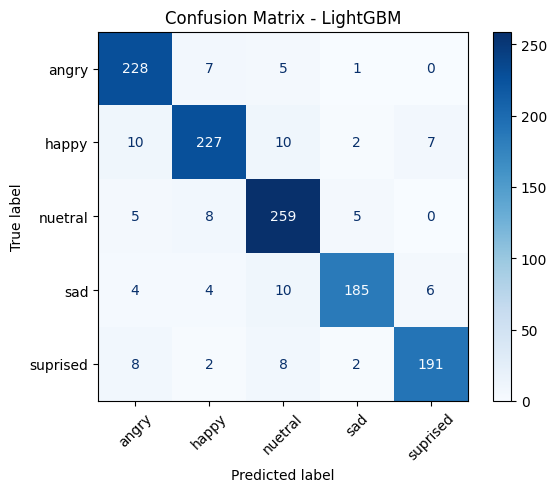

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = final_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - LightGBM")
plt.show()


In [ ]:
from sklearn.ensemble import VotingClassifier

# Create ensemble
ensemble = VotingClassifier(
    estimators=[
        ('lgb', LGBMClassifier(random_state=42)),
        ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)),
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
    ],
    voting='soft'  # soft = uses predicted probabilities
)

# Train
ensemble.fit(X_train, y_train)
ensemble_preds = ensemble.predict(X_test)

# Accuracy
from sklearn.metrics import accuracy_score
ensemble_acc = accuracy_score(y_test, ensemble_preds)
print(f"🎯 Ensemble Accuracy: {ensemble_acc * 100:.2f}%")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008609 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 39525
[LightGBM] [Info] Number of data points in the train set: 4774, number of used features: 155
[LightGBM] [Info] Start training from score -1.598812
[LightGBM] [Info] Start training from score -1.540445
[LightGBM] [Info] Start training from score -1.464245
[LightGBM] [Info] Start training from score -1.741116
[LightGBM] [Info] Start training from score -1.731603


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:37:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


🎯 Ensemble Accuracy: 91.88%


In [ ]:
!pip install -q catboost

from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(verbose=0, random_state=42)
cat_model.fit(X_train, y_train)
cat_preds = cat_model.predict(X_test)
cat_acc = accuracy_score(y_test, cat_preds)
print(f"🐱 CatBoost Accuracy: {cat_acc * 100:.2f}%")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.4 MB/s eta 0:00:00
🐱 CatBoost Accuracy: 90.87%


#EDA


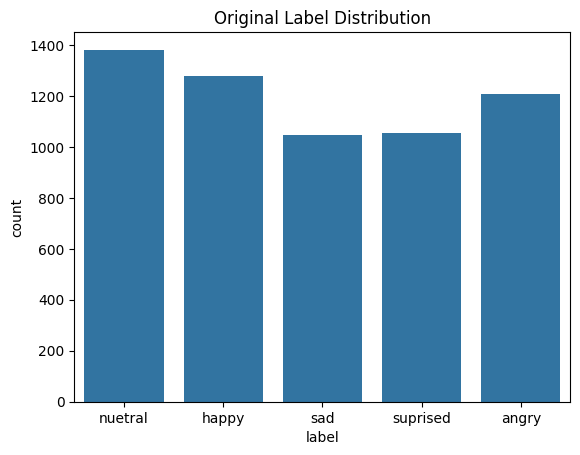

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='label', data=df)
plt.title("Original Label Distribution")
plt.show()


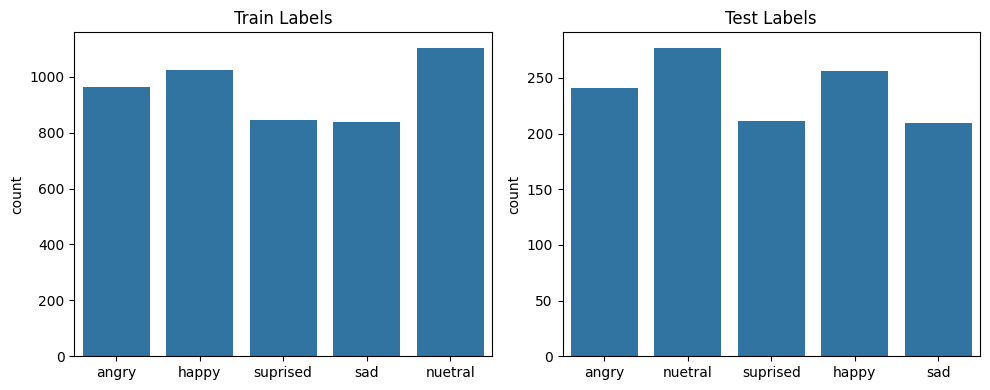

In [ ]:
import numpy as np
train_labels = le.inverse_transform(y_train)
test_labels = le.inverse_transform(y_test)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(x=train_labels)
plt.title("Train Labels")

plt.subplot(1,2,2)
sns.countplot(x=test_labels)
plt.title("Test Labels")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# y_test = actual labels
# y_pred = predictions by LightGBM
print(classification_report(y_test, y_pred, target_names=le.classes_))


              precision    recall  f1-score   support

       angry       0.89      0.95      0.92       241
       happy       0.92      0.89      0.90       256
     nuetral       0.89      0.94      0.91       277
         sad       0.95      0.89      0.92       209
    suprised       0.94      0.91      0.92       211

    accuracy                           0.91      1194
   macro avg       0.92      0.91      0.91      1194
weighted avg       0.91      0.91      0.91      1194



In [ ]:
!pip install pydub
!apt install ffmpeg -y  # required backend for audio conversion


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload your .opus file here


Saving WhatsApp Audio 2025-06-28 at 00.51.35_17ed3140.opus to WhatsApp Audio 2025-06-28 at 00.51.35_17ed3140.opus


In [ ]:
from pydub import AudioSegment
import os

# Get filename from upload
opus_file = list(uploaded.keys())[0]
wav_file = opus_file.replace(".opus", ".wav")

# ✅ Fix: Don't specify format — let ffmpeg auto-detect
audio = AudioSegment.from_file(opus_file)
audio.export(wav_file, format="wav")

print("✅ Successfully converted to WAV:", wav_file)


✅ Successfully converted to WAV: WhatsApp Audio 2025-06-28 at 00.51.35_17ed3140.wav


In [ ]:
import librosa
import numpy as np

def extract_features_for_single_file(file_path):
    y, sr = librosa.load(file_path, sr=None)

    zcr = np.mean(librosa.feature.zero_crossing_rate(y).T, axis=0)
    rmse = np.mean(librosa.feature.rms(y=y).T, axis=0)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T, axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(y=y, sr=sr).T, axis=0)
    mel = np.mean(librosa.feature.melspectrogram(y=y, sr=sr).T, axis=0)

    return np.hstack([zcr, rmse, mfcc, chroma, mel]).reshape(1, -1)


In [ ]:
features = extract_features_for_single_file(wav_file)
emotion = le.inverse_transform(final_model.predict(features))[0]
print("🧠 Predicted Emotion:", emotion)


🧠 Predicted Emotion: angry


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


TESTING


In [ ]:
# ✅ STEP 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import joblib

# Load the LightGBM model and LabelEncoder from Google Drive
final_model = joblib.load("/content/drive/MyDrive/final_model_lgbm.pkl")
le = joblib.load("/content/drive/MyDrive/label_encoder.pkl")

print("✅ Model and label encoder loaded successfully!")


✅ Model and label encoder loaded successfully!


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Recording (2).m4a to Recording (2) (1).m4a


In [ ]:
!pip install pydub
from pydub import AudioSegment
import os


In [ ]:
# Replace this with the exact filename you uploaded
input_file = "Recording (2) (1).m4a"   # <-- change this
output_file = "converted.wav"

# Convert to wav
audio = AudioSegment.from_file(input_file, format="m4a")
audio.export(output_file, format="wav")
print("✅ Audio converted to WAV format.")


✅ Audio converted to WAV format.


In [ ]:
import joblib

# Load saved model and encoder
model_path = "/content/drive/MyDrive/final_model_lgbm.pkl"
encoder_path = "/content/drive/MyDrive/label_encoder.pkl"

final_model = joblib.load(model_path)
le = joblib.load(encoder_path)


In [ ]:
import librosa
import numpy as np

def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=None)

    # Feature extraction
    zcr = np.mean(librosa.feature.zero_crossing_rate(y).T, axis=0)
    rms = np.mean(librosa.feature.rms(y=y).T, axis=0)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13).T, axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(y=y, sr=sr).T, axis=0)
    mel = np.mean(librosa.feature.melspectrogram(y=y, sr=sr).T, axis=0)

    # Combine all features into a single array
    feature_vector = np.hstack([zcr, rms, mfcc, chroma, mel])
    return feature_vector.reshape(1, -1)

features = extract_features("converted.wav")


In [ ]:
# Predict label
y_pred = final_model.predict(features)
predicted_emotion = le.inverse_transform(y_pred)[0]

print(f"🧠 Predicted Emotion: {predicted_emotion}")


🧠 Predicted Emotion: suprised


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
